<a href="https://colab.research.google.com/github/adolfoguimaraes/teoriadosgrafos/blob/main/04_%C3%81rvores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvores

![](https://media.giphy.com/media/Xee2ymyK455vdsBKXR/giphy.gif?cid=ecf05e47a3dcj5hrjt7u5iepl6wp1786zje9u854isfmhbxe&rid=giphy.gif&ct=g)

Vimos na aula de hoje um tipo especial de grafo que é a árvore. A árvore é um grafo que tem algumas propriedades específicas. São elas: 

* É conexo;
* Não possui ciclos;
* Existe exatamente um caminho simples entre qualquer par de vértices distintos;
* Possui n vértices e n-1 arestas;
* É minimamente conexo: a retirada de qualquer aresta torna o grafo desconexo;
* Ao adicionar uma aresta, o grafo possui exatamente um ciclo.


Vamos implementar alguns conceitos vistos em sala de aula. Preparados?

![](https://media.giphy.com/media/0lGOCxq1V8N7E1icuQ/giphy-downsized-large.gif?cid=ecf05e47c53q632mi5huuvo364goc3scxf3w7zy1e460tgdd&rid=giphy-downsized-large.gif&ct=g)


## Imports e Métodos auxiliares

In [ ]:

# importando a biblioteca 

import networkx as nx
import math

# importação da biblioteca para plotagem de gráficos 
import matplotlib.pyplot as plt

In [ ]:
# Função em Python para facilitar a impressão do Grafo. 

def exibir_grafo(grafo, labels=False):
  options = {
      'node_color': '#0080FF',
      'edge_color': '#808080',
      'node_size': 600,
      'width': 2,
      'font_color': 'white',
      'font_weight': 'bold',
      'font_size': 10

  }
  plt.figure(1)
  
  nx.draw_networkx(
      grafo, 
      pos=nx.spring_layout(grafo), 
      with_labels=True,
      **options
  )

  
  plt.show()

## Grafos de Exemplo

Vamos utilizar dois grafos dos slides como grafos de exemplos. 

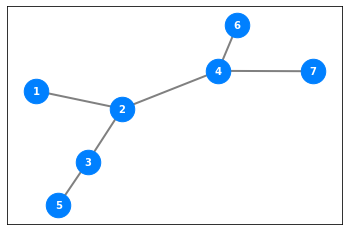

In [ ]:
# Instanciando o objeto Grafo
G = nx.Graph()

# Adicionando os Vértices
G.add_nodes_from([1,2,3,4,5,6,7])

# Adicionando as Arestas
G.add_edges_from([
                  (1,2),
                  (2,3),(2,4),
                  (3,5),
                  (4,6),(4,7)
                  ])
                 

exibir_grafo(G)

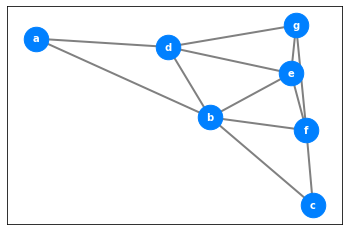

In [ ]:
# Instanciando o objeto Grafo
G1 = nx.Graph()

# Adicionando os Vértices
G1.add_nodes_from(["a","b","c","d","e","f","g"])

# Adicionando as Arestas
G1.add_edge("a", "b", weight=1)
G1.add_edge("a", "d", weight=4)
G1.add_edge("b", "c", weight=2)
G1.add_edge("b", "d", weight=6)
G1.add_edge("b", "e", weight=4)
G1.add_edge("b", "f", weight=8)
G1.add_edge("c", "f", weight=6)
G1.add_edge("d", "e", weight=3)
G1.add_edge("d", "g", weight=4)
G1.add_edge("e", "g", weight=9)
G1.add_edge("e", "f", weight=8)
G1.add_edge("f", "g", weight=3)


exibir_grafo(G1)

## Centro do Grafo

Nosso primeiro desafio é encontrar o centro de um grafo. Nesse caso, o centro de uma árvore. A gente viu em sala de aula que o centro do grafo é o vértice que tem o menor valor de excentricidade. Vimos também que a excentricidade de um vértice é a distância de v até o vértice mais longe de v. 

Vamos listar o passo a passo com base nestes conceitos:

![](https://media.giphy.com/media/4xWGyVKoXqg2eVCiq9/giphy.gif?cid=ecf05e47jgs76agxxj8cpbfek7tpnyc0hkinb82qgl4f31wu&rid=giphy.gif&ct=g)

- Para cada vértice do grafo vamos ver a distância dele para todos os demais vértices do grafo. Isso vai ser feito utilizando uma função que dado um vértice de origem e um vértice de destino retorna os caminhos entre esses dois pontos. Para resolver esse problema, vou utilizar o método `all_shortest_path` da biblioteca. Ele retorna todos os menores caminhos entre dois vértices. Como a gente fala em distância em árvore é exatamente esse caminho que a gente quer. 
- Em seguida, vou ver qual a maior distância de cada vértice e associar como excentricidade deste grafo. 
- Por fim, vamos pegar o vértice que tem o menor valor e retornar como centro do grafo. Lembrando o centro do grafo pode ser mais de um vértice. 



In [ ]:
# Método que retorna os centros do grafo
def graph_center(G):

  excentricy_graph = get_excentricy(G)
  center_ = center_graph(excentricy_graph)
  
  return center_



In [ ]:
# Método que retorna a excentricidade de cada vértice
def get_excentricy(G):
  result_dict = {}
  for nodeA in list(G.nodes()):
    maior = -math.inf
    for nodeB in list(G.nodes()):
      if(nodeA != nodeB):
        path_ = list(nx.all_shortest_paths(G, nodeA, nodeB))
        distancia_ = len(path_[0]) - 1
        if distancia_ > maior:
          maior = distancia_

    result_dict[nodeA] = maior

  
  return result_dict
  
        

In [ ]:
# Método que retorna os centros dado um dicionário com as excentricidades calculadas
def center_graph(dict_):
  result_return = []
  menor = min(dict_.values())
  for key in dict_:
    if dict_[key] == menor:
      result_return.append(key)

  return result_return

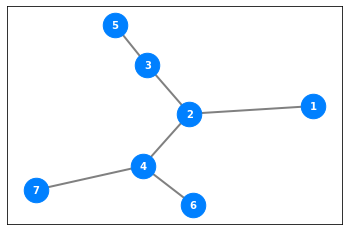

O centro do grafo G é composto pelos vértices: [2]


In [ ]:
# Aplicando os métodos
center_value = graph_center(G)
exibir_grafo(G)
print("O centro do grafo G é composto pelos vértices: %s" % center_value)

## Busca da Árvore Geradora Mínima

![](https://media.giphy.com/media/KKOMG9EB7VqBq/giphy-downsized-large.gif?cid=ecf05e47wg7h9xfkt4vjb521hw0xrauf9kv9fkwy9ecd2tel&rid=giphy-downsized-large.gif&ct=g)


Um outro tópico abordado na aula foi o algoritmo para encontrar a árvore geradora mínima. Vamos implementar o algoritmo de Prim. Utilizando a seguite lógica:

- Preciso de um método que identifique dada uma aresta se ela toca o conjunto B. 
- Uma vez que toca o conjuto B, eu pego a de menor peso e incluo na minha árvore geradora. 


Vale lembrar que uma aresta toca um conjunto se somente um de seus vértices estão nesse conjunto. 

Vamos lá? 


### Definindo o Grafo para teste

Vamos utilizar o mesmo grafo que foi visto em sala de aula para mostra os algoritmos. Ele está implementado aqui como o G1.

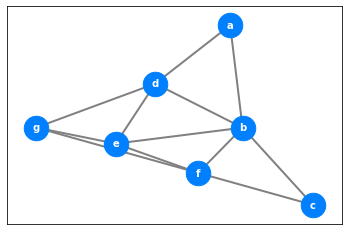

In [ ]:
exibir_grafo(G1)

Antes do método principal, vamos implementar 3 métodos auxiliares:

**Método que verifica se uma aresta toca um conjunto**

In [ ]:
# Método que verifica se um aresta toca um conjunto
def touch_(set_, edge):
  node_a = edge[0] in set_;
  node_b = edge[1] in set_;

  return node_a != node_b


**Método que retorna o peso de uma aresta**

In [ ]:
# Método que retorna o peso de uma aresta
def get_edge_data(graph, edge, data_):
  return graph.get_edge_data(edge[0], edge[1], data_)
  

**Método que retorna a aresta com menor peso dada um dicionário `{aresta: peso}`**

In [ ]:
# Método que retorna a aresta com menor peso dado um dicionário {aresta: peso}
def less_edge(dict_):

  less_value = math.inf
  edge_ = None
  for edge in dict_:
    if dict_[edge] < less_value:
      edge_ = edge
      less_value = dict_[edge]

  return edge_


### Pronto!!! Vamos implementar?

A proposta é implementar um método que dado um grafo retorna a árvore geradora mínima e o peso dessa árvore. 

🤖 Vamos tentar? Tente implementar sem olhar a resposta disponível. Agora é sua hora de treinar os algoritmos vistos. 

In [ ]:
# Coloque sua implmentação a partir daqui

### Implementação do Professor

In [ ]:
# Método que retorna a árvore geradora mínima
def return_gmin(grafo_):
  all_nodes = list(grafo_.nodes())
  all_edges = list(grafo_.edges())
  
  min_tree_edges = []
  
  B = [all_edges[0][0]]


  while set(all_nodes) != set(B):
    
    all_touch = {}

    for edge in list(all_edges):
      if touch_(B, edge):
        all_touch[edge] = get_edge_data(grafo_, edge, 'weigth')['weight']

    less_ = less_edge(all_touch)
    min_tree_edges.append(less_)

    if less_[1] not in B:
      B.append(less_[1])
    else:
      B.append(less_[0])
    

  G_min = grafo_.copy()
  weigth_gmin = 0

  for edge_g in list(G_min.edges()):
    if edge_g not in min_tree_edges:
      G_min.remove_edge(edge_g[0], edge_g[1])
    else:
      weigth_gmin += get_edge_data(grafo_, edge_g, 'weigth')['weight']


  return G_min, weigth_gmin


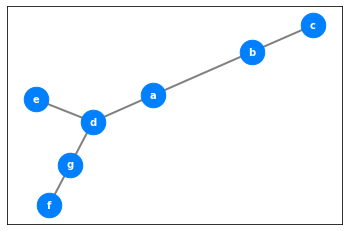

Peso da árvore:  17


In [ ]:
# Aplicando os métodos
g_min, w = return_gmin(G1)
exibir_grafo(g_min)
print("Peso da árvore: % i" % w)

### É isso pessoal. Por hoje é só. 

Essa implementação serve não só para que a gente aplique os conceitos vistos em sala de aula, mas também para que vocês vão se acostumando como implementar utilizando a biblioteca e, principalmente, como sair do algoritmo que vimos em sala de aula para a lógica de progração. 

![](https://media.giphy.com/media/26DN48mfu3uWJ3J7y/giphy.gif?cid=ecf05e47ic3zerdnxap46ifvv661vtpn8cgzhu2eitl9z6bu&rid=giphy.gif&ct=g)

Até a próxima :) 